In [1]:
!nvidia-smi
!nvcc --version
!where nvcc

Wed Feb 19 11:45:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.16                 Driver Version: 572.16         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2070 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   68C    P8             10W /   80W |     211MiB /   8192MiB |     25%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import transformers
import tensorflow as tf
import keras

print(f"Transformers: {transformers.__version__}")
print(f"TensorFlow: {tf.__version__}")
print(f"Keras: {keras.__version__}")

c:\Users\f1soft\anaconda3\envs\python-39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Transformers: 4.49.0
TensorFlow: 2.13.1
Keras: 2.13.1


In [3]:
from transformers import pipeline

# Zero-Shot Classification 모델 로드
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# 문장을 입력받아 주어진 클래스 레이블에 대해 해당 문장이 어떤 클래스에 속하는지 예측하는 모델

Device set to use cuda:0


In [ ]:
# 예측할 문장과 클래스 레이블
sequence_to_classify = "This is a sentence about science." # 이것은 과학에 관한 문장입니다.
candidate_labels = ["education", "business", "politics"] # 교육, 비즈니스, 정치

# 모델 적용
output = classifier(sequence_to_classify, candidate_labels)

# 결과 출력
sequence = output["sequence"]
labels = output["labels"]
scores = output["scores"]

In [5]:
print(f"입력 문장: {sequence}")

for label, score in zip(labels, scores):
    print(f"{label}: {score:.3f}")

입력 문장: This is a sentence about science.
education: 0.398
business: 0.376
politics: 0.226


In [16]:
import matplotlib.pyplot as plt

def plot_results(labels, scores):
    """분류 결과를 막대 그래프로 시각화"""
    plt.figure(figsize=(8, 2))
    plt.barh(labels, scores, color='skyblue')
    plt.xlabel("Confidence Score")
    plt.ylabel("Category")
    plt.title("Zero-Shot Classification Results")
    plt.gca().invert_yaxis()
    plt.show()

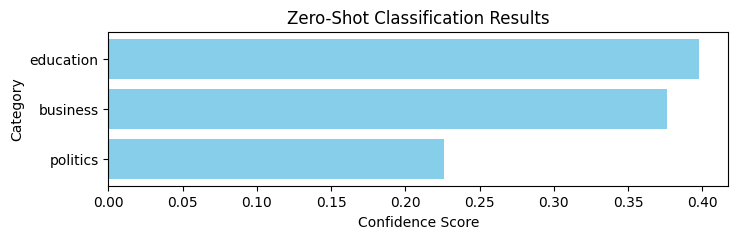

In [17]:
plot_results(labels, scores)